# KMeans clustering 
## Medical Dataset
### Eric Yarger

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.0.3
qtconsole        : 4.7.2
ipython          : 7.13.0
ipykernel        : 5.1.4
jupyter client   : 6.1.2
jupyter lab      : 1.2.6
nbconvert        : 5.6.1
ipywidgets       : 7.5.1
nbformat         : 5.0.4
traitlets        : 4.3.3


In [3]:
# Python Environment version
import platform
print(platform.python_version())

3.7.7


In [4]:
df = pd.read_csv('C:/Users/ericy/Desktop/medical_clean.csv')

# Dataset, Initial Investigation

In [5]:
# Dataset, first glance

In [6]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

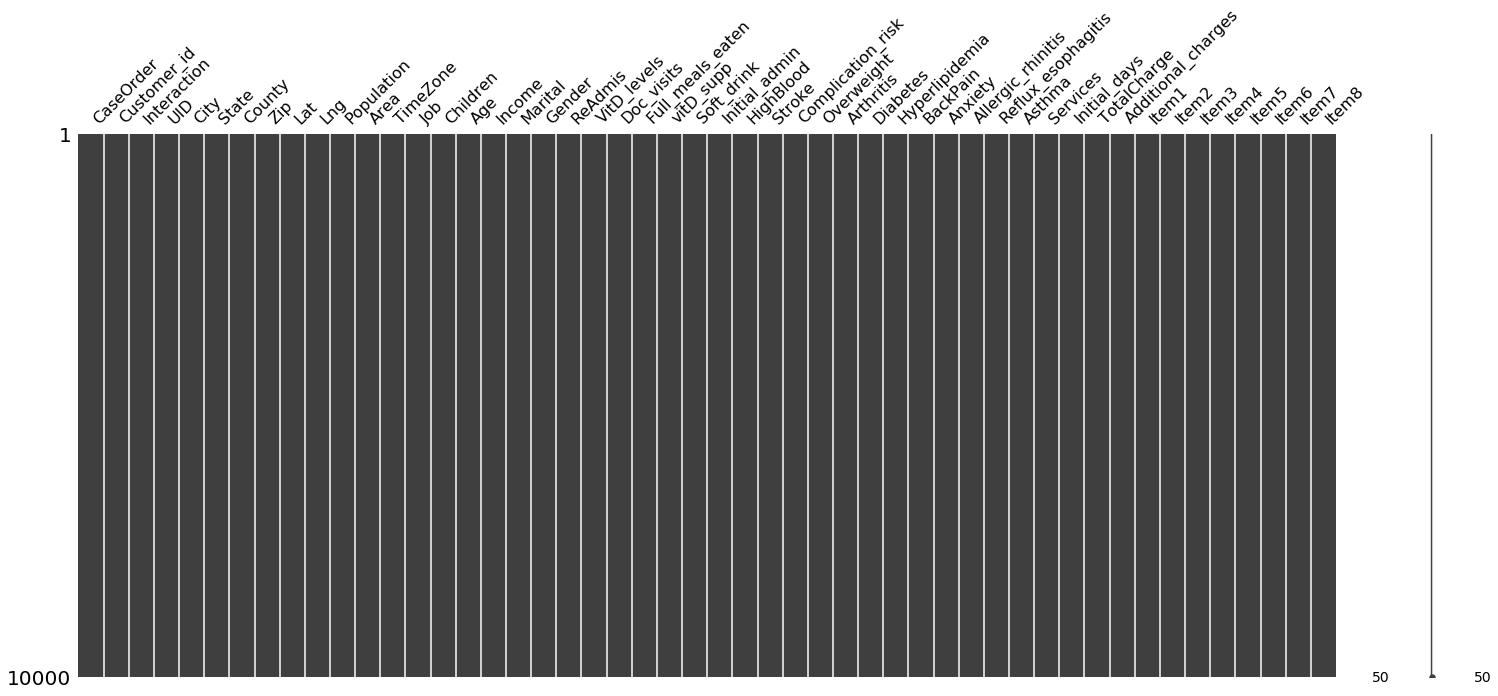

In [7]:
msno.matrix(df)

# Data Preprocessing

## Step P1, Data Cleaning

In [8]:
# Duplicate Check
df.duplicated().sum()

0

In [9]:
# Removing unnecessary columns
# Selecting ReAdmis (Target) 
# Selecting continuous dependent features
dfs = df[['Income','Additional_charges']]
dfs

,Income,Additional_charges
0,86575.93,17939.403420
1,46805.99,17612.998120
2,14370.14,17505.192460
3,39741.49,12993.437350
4,1209.56,3716.525786
...,...,...
9995,45967.61,8927.642000
9996,14983.02,28507.150000
9997,65917.81,15281.210000
9998,29702.32,7781.678000


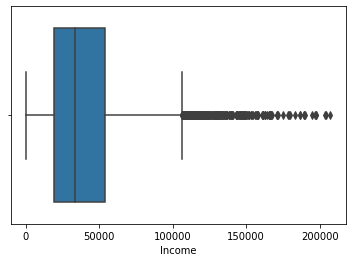

In [10]:
# Outlier Removal
# Boxplots, outlier detection
sns.boxplot(dfs['Income'])

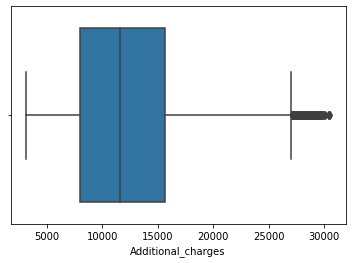

In [11]:
sns.boxplot(dfs['Additional_charges'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7E7464788>,
      dtype=object)

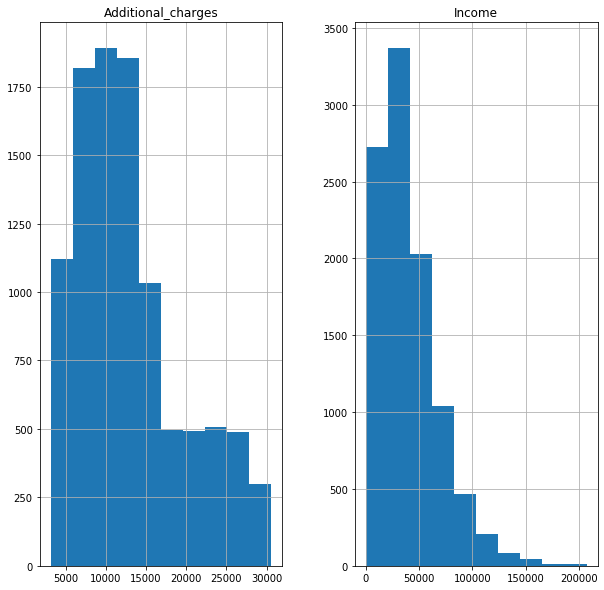

In [12]:
dfs.hist(figsize=(10,10))

In [13]:
# Outlier removal method via Z-score, Code reference (Bushmanov, 2019)

num_data = dfs.select_dtypes(include=['number'])
cat_data = dfs.select_dtypes(exclude=['number'])

In [14]:
idx = np.all(stats.zscore(num_data) <3, axis=1)

In [15]:
dfs = pd.concat([num_data.loc[idx], cat_data.loc[idx]], axis=1)

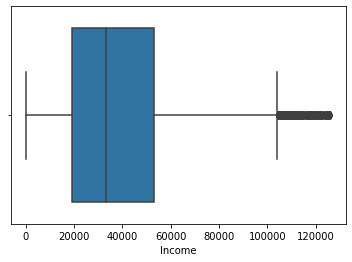

In [16]:
# Post Outlier Removal
# Boxplots
sns.boxplot(dfs['Income'])

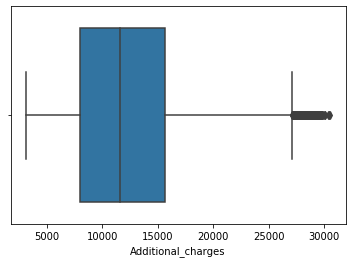

In [17]:
sns.boxplot(dfs['Additional_charges'])

In [18]:
dfs

,Income,Additional_charges
0,86575.93,17939.403420
1,46805.99,17612.998120
2,14370.14,17505.192460
3,39741.49,12993.437350
4,1209.56,3716.525786
...,...,...
9995,45967.61,8927.642000
9996,14983.02,28507.150000
9997,65917.81,15281.210000
9998,29702.32,7781.678000


## Step P2, Missing Data

In [19]:
# Check for and Handle any missing data
dfs.isnull().sum()

Income                0
Additional_charges    0
dtype: int64

In [20]:
dfs.isna().sum()

Income                0
Additional_charges    0
dtype: int64

In [21]:
dfs.isnull().any()

Income                False
Additional_charges    False
dtype: bool

In [22]:
dfs

,Income,Additional_charges
0,86575.93,17939.403420
1,46805.99,17612.998120
2,14370.14,17505.192460
3,39741.49,12993.437350
4,1209.56,3716.525786
...,...,...
9995,45967.61,8927.642000
9996,14983.02,28507.150000
9997,65917.81,15281.210000
9998,29702.32,7781.678000


## Step P3, Data Transformation

In [23]:
X = dfs

In [24]:
# Set Before Normalization
X

,Income,Additional_charges
0,86575.93,17939.403420
1,46805.99,17612.998120
2,14370.14,17505.192460
3,39741.49,12993.437350
4,1209.56,3716.525786
...,...,...
9995,45967.61,8927.642000
9996,14983.02,28507.150000
9997,65917.81,15281.210000
9998,29702.32,7781.678000


In [25]:
# Data Normalization using Min/Max Scaling
# Code Reference (Data normalization with pandas, 2020)
X = (X - X.min()) / (X.max() - X.min())



In [26]:
# Set After Normalization
X

,Income,Additional_charges
0,0.686851,0.539851
1,0.370773,0.527956
2,0.112984,0.524027
3,0.314627,0.359607
4,0.008389,0.021531
...,...,...
9995,0.364110,0.211438
9996,0.117855,0.924967
9997,0.522667,0.442979
9998,0.234839,0.169676


In [27]:
# Check for Skew
# Code Reference (Python | Pandas dataframe.skew(), 2022)
X.skew(axis = 0, skipna = True)

Income                0.942369
Additional_charges    0.831749
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7E6838F48>,
      dtype=object)

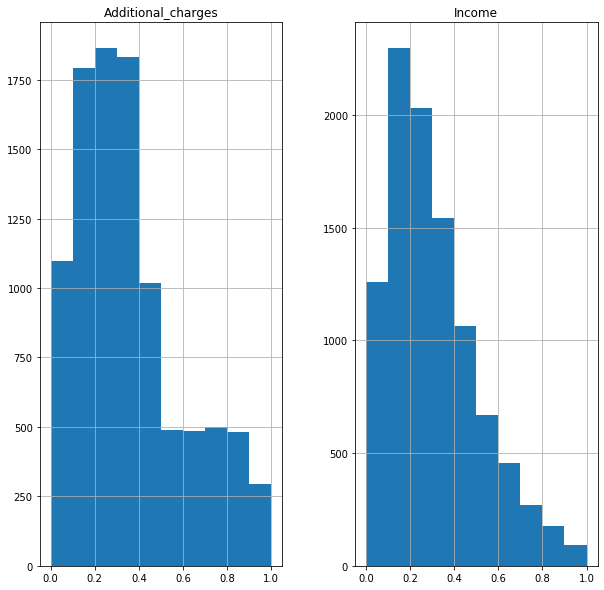

In [28]:
X.hist(figsize=(10,10))

In [29]:
X.mean()

Income                0.308010
Additional_charges    0.357885
dtype: float64

In [30]:
X.median()

Income                0.263370
Additional_charges    0.308104
dtype: float64

In [31]:
# Square-Root Transformation on dataset
Xs = X.apply(np.sqrt)

In [32]:
Xs.skew()

Income                0.201145
Additional_charges    0.127993
dtype: float64

In [33]:
Xs.mean()

Income                0.524266
Additional_charges    0.562884
dtype: float64

In [34]:
Xs.median()

Income                0.513196
Additional_charges    0.555071
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7E6946848>,
      dtype=object)

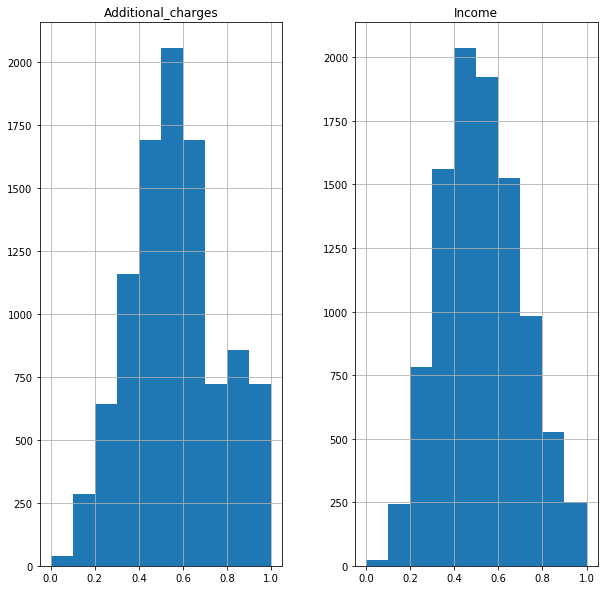

In [35]:
Xs.hist(figsize=(10,10))

In [36]:
Xs

,Income,Additional_charges
0,0.828765,0.734745
1,0.608912,0.726606
2,0.336131,0.723897
3,0.560916,0.599672
4,0.091589,0.146735
...,...,...
9995,0.603415,0.459824
9996,0.343301,0.961752
9997,0.722957,0.665567
9998,0.484602,0.411918


In [37]:
X = Xs

In [38]:
# Read out dataset
X.to_excel('C:/Users/ericy/Desktop/cleaned_data.xlsx')

# K-means clustering

In [39]:
# Prepared dataset cleaned_data
# Code reference (Sklearn.cluster.KMeans, n.d.)
import sklearn

In [40]:
from sklearn.cluster import KMeans

In [41]:
X

,Income,Additional_charges
0,0.828765,0.734745
1,0.608912,0.726606
2,0.336131,0.723897
3,0.560916,0.599672
4,0.091589,0.146735
...,...,...
9995,0.603415,0.459824
9996,0.343301,0.961752
9997,0.722957,0.665567
9998,0.484602,0.411918


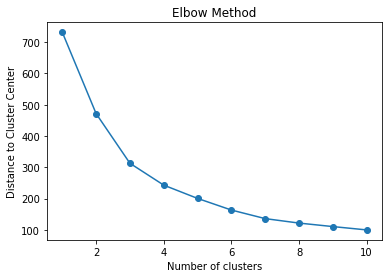

In [42]:
# Initial KMeans.  run for 1-11 clusters.  
# Elbow Plot
#Code Reference (Machine learning - K-means, n.d.)
# Sum of square distance from cluster center
ssdistance = []


# Kmeans from 1 to 11 loop
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    ssdistance.append(kmeans.inertia_)

plt.plot(range(1,11), ssdistance, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distance to Cluster Center')
plt.show() 

In [43]:
from sklearn.metrics import silhouette_score
# Code Reference (Arvai, 2020)

In [44]:
# KMeans clusters = 2
kmeans2 = KMeans(n_clusters = 2, init='k-means++', random_state=10)

# Fit the model
kmeans2.fit(X)

# Silhouette Score
kmeans2_silhouette = silhouette_score(X, kmeans2.labels_)

# Print Silhouette Score
print('Silhouette Score: %.3f' %kmeans2_silhouette)

Silhouette Score: 0.320


In [45]:
# KMeans clusters = 3
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=10)

# Fit the model
kmeans3.fit(X)

# Silhouette Score
kmeans3_silhouette = silhouette_score(X, kmeans3.labels_)

# Print Silhouette Score
print('Silhouette Score: %.3f' %kmeans3_silhouette)

Silhouette Score: 0.352


In [46]:
# KMeans clusters = 4
kmeans4 = KMeans(n_clusters = 4, init='k-means++', random_state=10)

# Fit the model
kmeans4.fit(X)

# Silhouette Score
kmeans4_silhouette = silhouette_score(X, kmeans4.labels_)

# Print Silhouette Score
print('Silhouette Score: %.3f' %kmeans4_silhouette)

Silhouette Score: 0.347


In [47]:
# KMeans clusters = 5
kmeans5 = KMeans(n_clusters = 5, init='k-means++', random_state=10)

# Fit the model
kmeans5.fit(X)

# Silhouette Score
kmeans5_silhouette = silhouette_score(X, kmeans5.labels_)

# Print Silhouette Score
print('Silhouette Score: %.3f' %kmeans5_silhouette)

Silhouette Score: 0.332


In [48]:
# KMeans clusters = 10
kmeans10 = KMeans(n_clusters = 10, init='k-means++', random_state=10)

# Fit the model
kmeans10.fit(X)

# Silhouette Score
kmeans10_silhouette = silhouette_score(X, kmeans10.labels_)

# Print Silhouette Score
print('Silhouette Score: %.3f' %kmeans10_silhouette)

Silhouette Score: 0.332


In [49]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
#Code Reference (Yellowbrick :: Anaconda.org, n.d.)

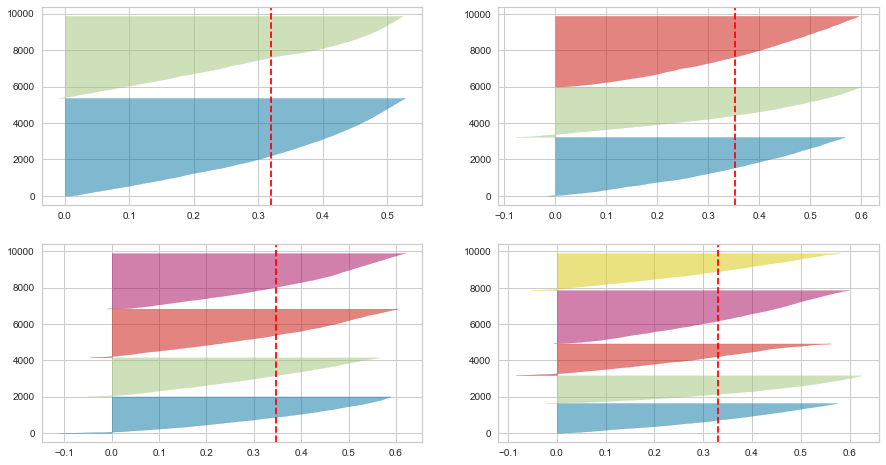

In [50]:
# Code Reference (Kumar, 2020)
# Silhouette score.  Visualization using yellowbrick's Silhouette Visualizer

    
    #plot sizing 
fig, ax = plt.subplots(2, 2, figsize=(15,8))


#KMeans for 2,3,4,5 'k' clusters
for i in [2, 3, 4, 5]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    
    visualization = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])

    #Fit the visualizer

    visualization.fit(X)

In [51]:
# Code Reference (How to plot KMeans?, n.d.)

centroids = kmeans3.cluster_centers_
labels = kmeans3.labels_

print(centroids)
print(labels)

[[0.51699125 0.81334543]
 [0.38289295 0.46267265]
 [0.70073493 0.46864602]]
[2 0 0 ... 2 1 2]


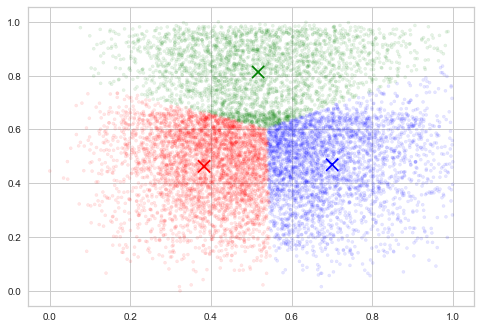

In [52]:
colors = ["green","red","blue"]

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=np.array(colors)[labels], 
    s = 10, alpha=.1)

plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", s=150, 
    linewidths = 5, zorder = 10, c=['green', 'red','blue'])
plt.show()

In [53]:
X

,Income,Additional_charges
0,0.828765,0.734745
1,0.608912,0.726606
2,0.336131,0.723897
3,0.560916,0.599672
4,0.091589,0.146735
...,...,...
9995,0.603415,0.459824
9996,0.343301,0.961752
9997,0.722957,0.665567
9998,0.484602,0.411918
